# Briding - Coding with Jupyter Notebook


0. Markdowns, Headings, Comments
1. Built-in modules, third party packages 
2. Arrays, Dictionary and Data frames 
3. Save your work in a readable format


## 1. Built-in Python Modules and Third-party Packages

### 1.1 Built-in modules  `math`

You may import built-in python modules without installing them.

Standard libraries distributed with Python:: https://docs.python.org/3.10/library/index.html

In [1]:
import math 
# Documentation https://docs.python.org/3.10/library/math.html
# various functions/variables in math module: ceil, floor, sqrt, pi, log10.

print(math.ceil(1.44))
print(math.floor(10.44))
print(math.sqrt(16))
print(math.pi)
print(math.log10(122))

2
10
4.0
3.141592653589793
2.0863598306747484


### 1.2  Third-party packages
Unlike built-in moduels, there are lots of third-party python packages (e.g., ``pandas``, ``numpy``, ``matplolib``) which you need to install before importing.
- use ``pip`` command in Jupyter Notebook

In [2]:
#pip install pandas numpy matplotlib

Import ``pandas`` and ``numpy`` first.

In [3]:
import pandas as pd  
# Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/

import numpy as np
# Documentation: https://numpy.org/doc/stable/reference/

## 2. Arrays, Dictionary and Data frames 

### 2.1 Handle arrays with `numpy`

In [4]:
arr = np.array([[1,2,6],[4,5,1]])
arr

array([[1, 2, 6],
       [4, 5, 1]])

In [5]:
arr.shape   

(2, 3)

In [6]:
print(arr[0])    # print values on the first row
print(arr[0,0])  # print value in first row, first column

[1 2 6]
1


In [7]:
print(np.max(arr))         # return max value in the flattened array
print(np.max(arr,axis=0))  # compare across rows and return max values  
print(np.max(arr,axis=1))  # compare across columns and return max values

6
[4 5 6]
[6 5]


In [8]:
arr + 10   # element-by-element computation

array([[11, 12, 16],
       [14, 15, 11]])

In [9]:
arr**2    # raise each element to its 2nd power

array([[ 1,  4, 36],
       [16, 25,  1]])

### 2.2 Handle data frames with `pandas`

We can create a data frame from an array.

In [10]:
df = pd.DataFrame(data = arr, 
                  columns=['a', 'b', 'c'], 
                  index = ['r1','r2']) 
df

,a,b,c
r1,1,2,6
r2,4,5,1


In [11]:
df.columns    

Index(['a', 'b', 'c'], dtype='object')

In [12]:
df.index

Index(['r1', 'r2'], dtype='object')

In [13]:
df.shape      # check data shape

(2, 3)

In [14]:
df['a']       # select a column by its name

r1    1
r2    4
Name: a, dtype: int64

We can also create a data frame from a dictionary with `key: value` pairs.  Check [Dictionary Tutorial](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) for details about dictionary. 


In [15]:
car_dict = {
  "brand": ["Ford",'BMW','Volkswagen','Benz','Benz','Benz','Volkswagen','Volkswagen'],
  "electric": [False,True,False,True,True,False,True,False],
  "year": [1964,1980,2000,1990,2011,2000,2000,2022],
  "colors": ["red", "white", "blue",'white','red','blue','white','white'],
  "price":[500,1000,700,1200,100,100,80,130]
}

car_dict

{'brand': ['Ford',
  'BMW',
  'Volkswagen',
  'Benz',
  'Benz',
  'Benz',
  'Volkswagen',
  'Volkswagen'],
 'electric': [False, True, False, True, True, False, True, False],
 'year': [1964, 1980, 2000, 1990, 2011, 2000, 2000, 2022],
 'colors': ['red', 'white', 'blue', 'white', 'red', 'blue', 'white', 'white'],
 'price': [500, 1000, 700, 1200, 100, 100, 80, 130]}

In [16]:
car_df = pd.DataFrame(car_dict)

car_df

,brand,electric,year,colors,price
0,Ford,False,1964,red,500
1,BMW,True,1980,white,1000
2,Volkswagen,False,2000,blue,700
3,Benz,True,1990,white,1200
4,Benz,True,2011,red,100
5,Benz,False,2000,blue,100
6,Volkswagen,True,2000,white,80
7,Volkswagen,False,2022,white,130


In [17]:
car_df.set_index('brand', inplace=True)   # set "brand" column as index, replace existing data frame 

car_df

,electric,year,colors,price
brand,,,,
Ford,False,1964,red,500
BMW,True,1980,white,1000
Volkswagen,False,2000,blue,700
Benz,True,1990,white,1200
Benz,True,2011,red,100
Benz,False,2000,blue,100
Volkswagen,True,2000,white,80
Volkswagen,False,2022,white,130


In [18]:
car_df.reset_index(inplace = True)  # reset the index as default numbers 

car_df

,brand,electric,year,colors,price
0,Ford,False,1964,red,500
1,BMW,True,1980,white,1000
2,Volkswagen,False,2000,blue,700
3,Benz,True,1990,white,1200
4,Benz,True,2011,red,100
5,Benz,False,2000,blue,100
6,Volkswagen,True,2000,white,80
7,Volkswagen,False,2022,white,130


Save the above dataframe ``car_df`` as a csv file named ``car_df.csv`` in my work folder where this notebook is located (i.e., ``/Users/jingliu/OneDrive - Hong Kong Baptist University/Bridging_python``), just indicate the file name would be enough. 

In [19]:
car_df.to_csv('car_df.csv',index = False)    # save the data frame as a csv file in CWD, ignore index

### 2.3 Simple Data Visualization 

Here we have saved a csv file named ``diabetes.csv`` in the ``Data`` folder in CWD. 

- The absolute path to the folder is is `/Users/jingliu/OneDrive - Hong Kong Baptist University/Bridging_python/Data`
- Note we aleady imported pandas earlier. 

In [20]:
df = pd.read_csv('Data/diabetes.csv')  ## Read in a csv file - relative path

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Visualize the relationship between ``Age`` and ``BMI`` with a simple scatter plot. 

-- Need to import ``matplotlib``first.

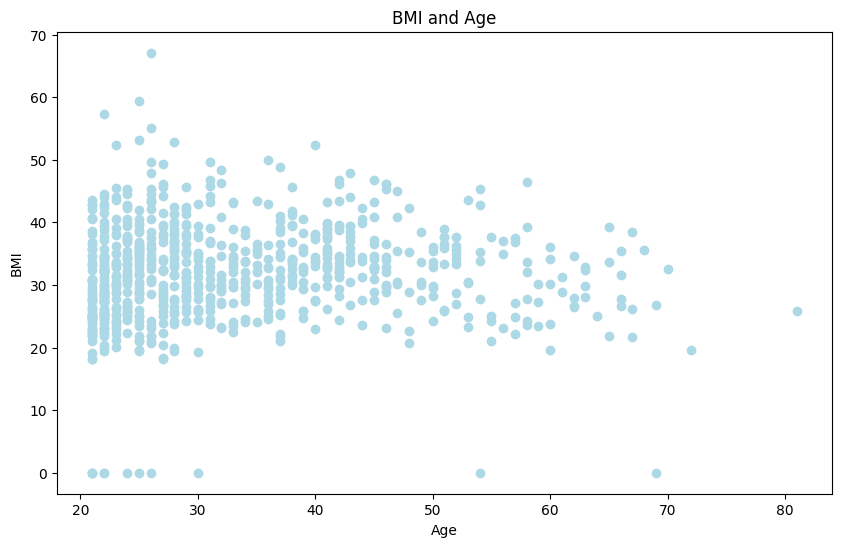

In [21]:
import matplotlib.pyplot as plt     # Documentation: https://matplotlib.org/stable/

fig = plt.figure(figsize=(10,6))   # create a new figure with specific figsize(width, height in inches)
plt.scatter(df['Age'], df['BMI'], color='lightblue')
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title('BMI and Age');

In [22]:
fig.savefig('a_simple_plot.jpeg')   # save to local folder